In [2]:
import pandas as pd
import sys
import numpy as np
import quantstats as qs
sys.path.append('..')
from functools import reduce

from backtest.performance_generater import PerformanceGenerator
from backtest.operators import *

In [3]:
open = pd.read_csv('/Volumes/Database/Factor_data/open.csv', index_col=0, parse_dates=True)
Close = pd.read_csv('/Volumes/Database/Factor_data/close.csv', index_col=0, parse_dates=True)
High = pd.read_csv('/Volumes/Database/Factor_data/high.csv', index_col=0, parse_dates=True)
Low = pd.read_csv('/Volumes/Database/Factor_data/low.csv', index_col=0, parse_dates=True)
Volume = pd.read_csv('/Volumes/Database/Factor_data/volume.csv', index_col=0, parse_dates=True)
returns = pd.read_csv('/Volumes/Database/Factor_data/return.csv', index_col=0, parse_dates=True)
exp_returns = returns.shift(-2) * 0.01

In [4]:
ZTXA_close = pd.read_csv('/Volumes/Database/Factor_data/ZXTA_close.csv', index_col=0, parse_dates=True)
ZTXA_close.index = pd.to_datetime(ZTXA_close.index)
market_returns = ZTXA_close['ZTXA'].pct_change()
Benchmark = ZTXA_close['ZTXA'].pct_change().shift(-2)

In [5]:
Volume_y_avg = Volume.rolling(252).mean()
Close_y_avg = Close.rolling(252).mean()
Volume_Filter = Volume_y_avg > 200
trade_volume_Filter = Close_y_avg * Volume_y_avg > 1000


/Users/tedting/anaconda3/envs/quant311/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tedting/anaconda3/envs/quant311/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tedting/anaconda3/envs/quant311/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, p

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2013-05-15   2013-05-15
End Period                 2024-03-12   2024-03-12
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          136.72%      1,357.14%
CAGR﹪                     5.65%        18.62%

Sharpe                     0.59         1.43
Prob. Sharpe Ratio         97.02%       100.0%
Smart Sharpe               0.57         1.38
Sortino                    0.81         1.96
Smart Sortino              0.78         1.9
Sortino/√2                 0.57         1.39
Smart Sortino/√2           0.55         1.34
Omega                      1.29         1.29

Max Drawdown               -31.51%      -30.87%
Longest DD Days            760          327
Volatility (ann.)          16.15%       19.15%
R^2                        0.43         0.43
Information Ratio          0.08         0.08
Calmar           

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2019-10-25,2020-03-17,2020-04-24,183,-30.869108,-26.531635
2,2015-04-16,2015-08-20,2016-02-24,315,-27.219430,-22.208384
3,2021-04-28,2021-05-13,2021-06-23,57,-24.767468,-19.637903
4,2018-08-30,2018-10-26,2019-07-22,327,-23.847904,-21.500149
5,2022-06-09,2022-10-19,2023-02-03,240,-16.328566,-16.128819


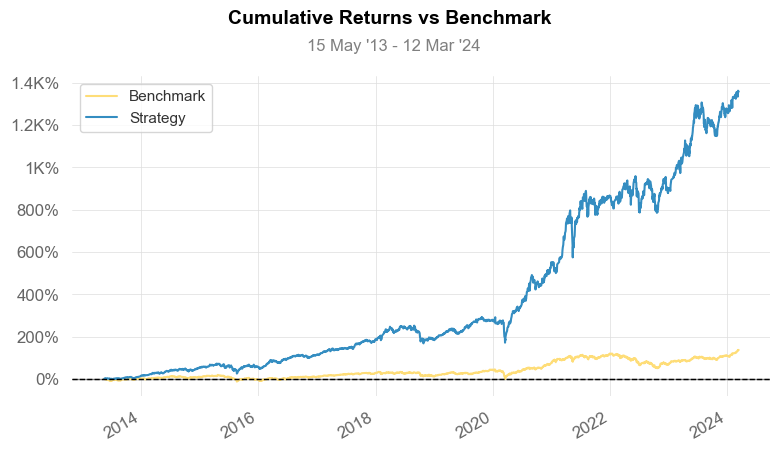

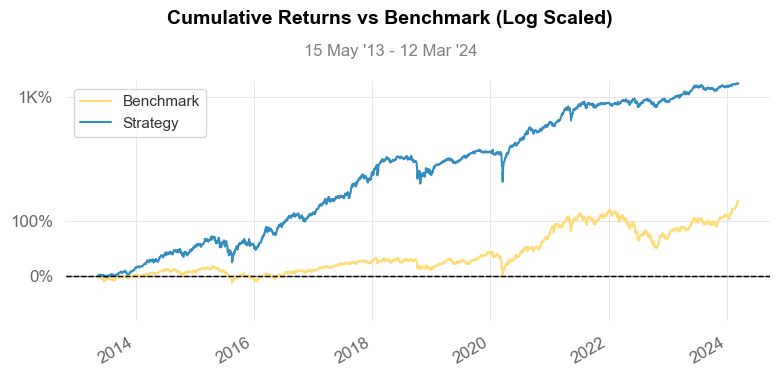

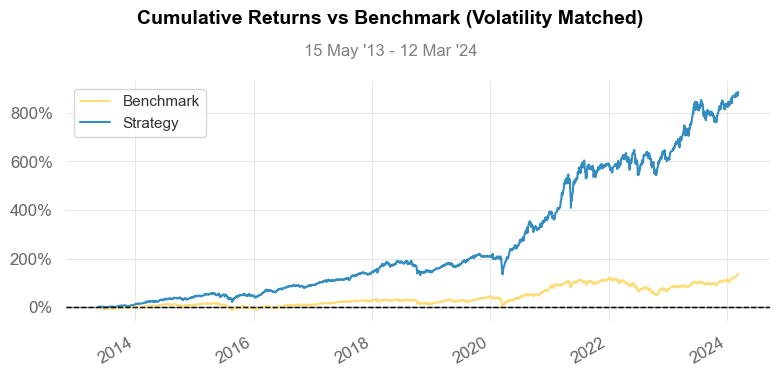

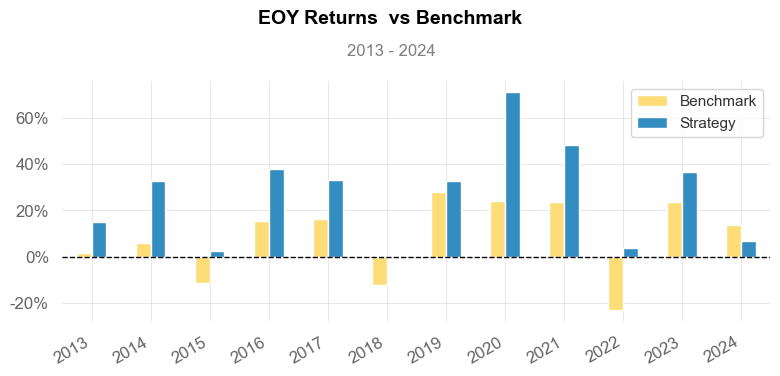

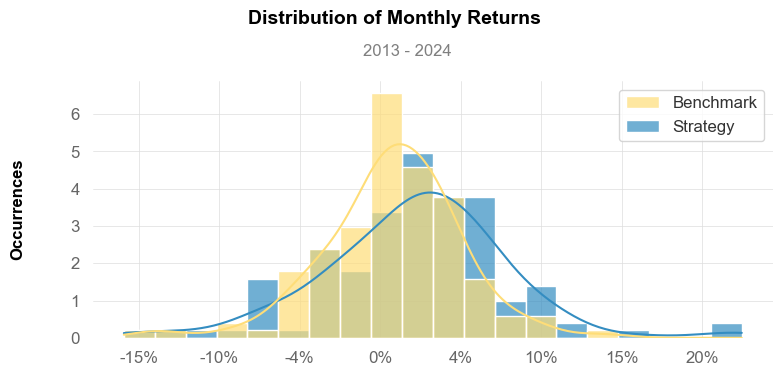

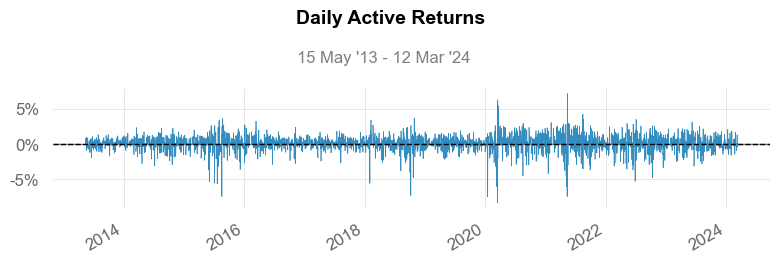

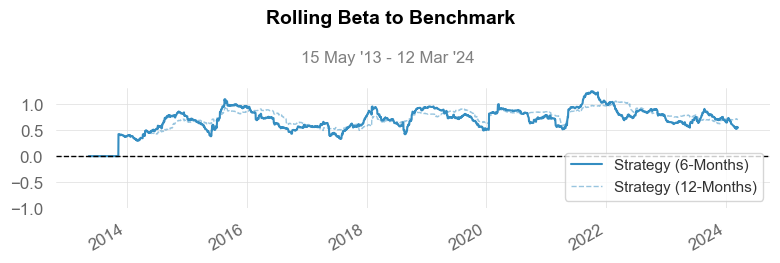

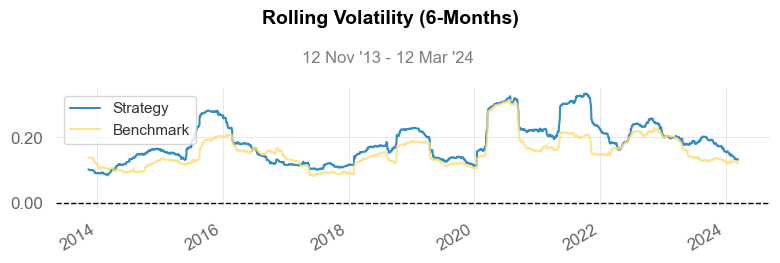

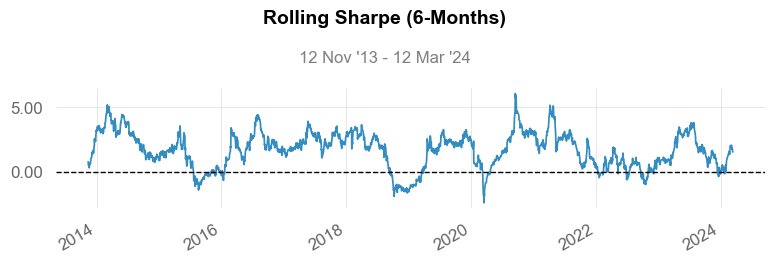

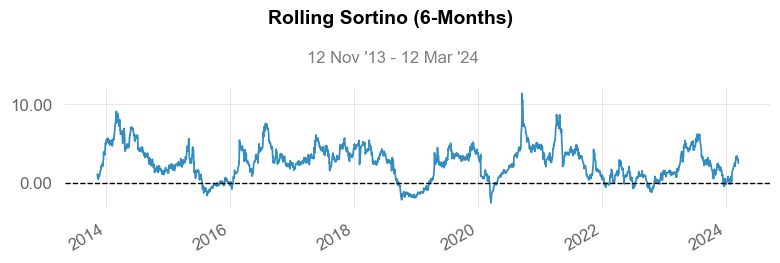

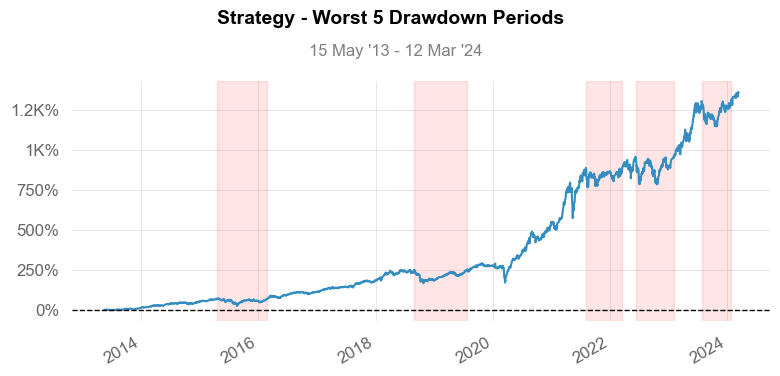

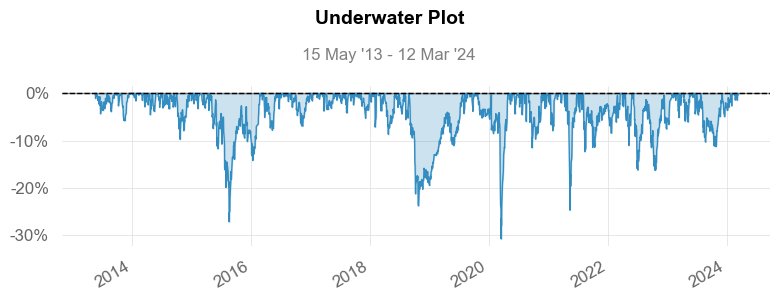

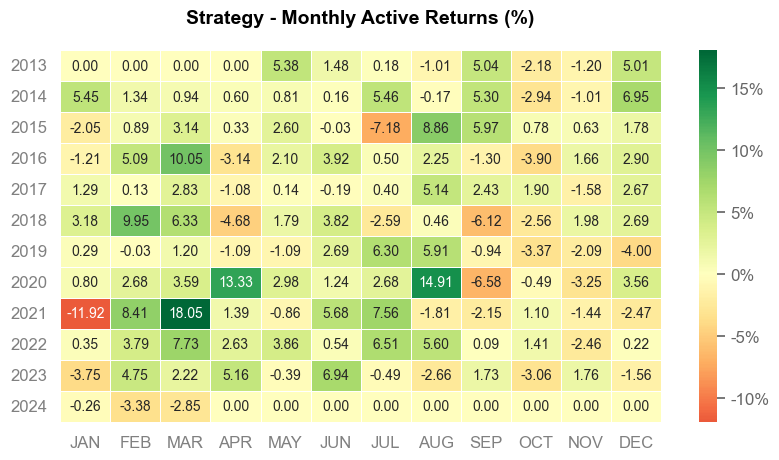

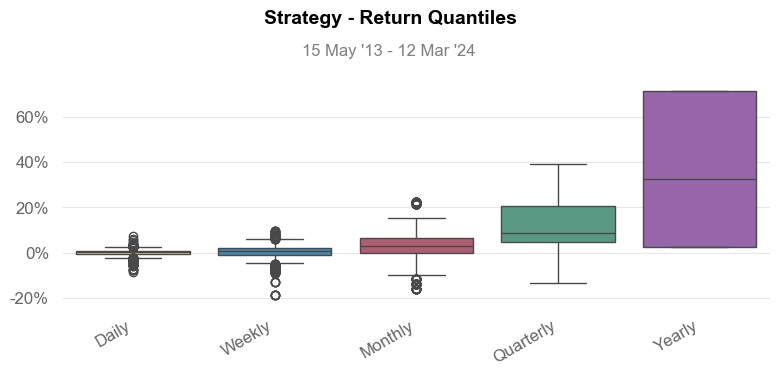

In [13]:
close = pd.read_csv('/Volumes/Database/Factor_data/close.csv', index_col=0, parse_dates=True)
operatingmargin = pd.read_csv('/Volumes/Database/Factor_data/營業利益率_90.csv', index_col=0, parse_dates=True) * 0.01
revenue_m = pd.read_csv('/Volumes/Database/Factor_data/以合併為主單月營收(千元)_90.csv', index_col=0, parse_dates=True)
outstanding = pd.read_csv('/Volumes/Database/Factor_data/流通在外股數(千股).csv', index_col=0, parse_dates=True)
FIIBV = pd.read_csv('/Volumes/Database/Factor_data/外資買進張數.csv', index_col=0, parse_dates=True)
ITBV = pd.read_csv('/Volumes/Database/Factor_data/投信買進張數.csv', index_col=0, parse_dates=True)
PTBV = pd.read_csv('/Volumes/Database/Factor_data/自營商買進張數.csv', index_col=0, parse_dates=True)
FIISV = pd.read_csv('/Volumes/Database/Factor_data/外資賣出張數.csv', index_col=0, parse_dates=True)
ITSV = pd.read_csv('/Volumes/Database/Factor_data/投信賣出張數.csv', index_col=0, parse_dates=True)
PTSV = pd.read_csv('/Volumes/Database/Factor_data/自營商賣出張數.csv', index_col=0, parse_dates=True)
ROE = pd.read_csv('/Volumes/Database/Factor_data/ROE(A)－稅後_90.csv', index_col=0, parse_dates=True)

totalasset = pd.read_csv('/Volumes/Database/Factor_data/資產總額_90.csv', index_col=0, parse_dates=True)
revenue_yoy = pd.read_csv('/Volumes/Database/Factor_data/單月營收成長率％_90.csv', index_col=0, parse_dates=True)

revenue_m = pd.read_csv('/Volumes/Database/Factor_data/以合併為主單月營收(千元)_90.csv', index_col=0, parse_dates=True)
ts_revenue_yoy = ts_rank(revenue_yoy, 252)

RevenuetoTotalasset = revenue_m/totalasset

ROE = ROE 

totalvolume = (FIIBV + ITBV + PTBV + FIISV + ITSV + PTSV)
totalvalue = totalvolume * close
ThreeII_totaltradevalue_52to252 = ts_mean(totalvalue, 52)/ts_mean(totalvalue, 12*21)
result_df = ThreeII_totaltradevalue_52to252
operatingincome = revenue_m * operatingmargin
cap = close * outstanding
operatingincometocap = operatingincome/cap

dfs = [ts_revenue_yoy,
       RevenuetoTotalasset,
       # ROE,
       # ThreeII_totaltradevalue_52to252,
       operatingincometocap
       ]

# 使用 reduce 進行累加
result_df = reduce(lambda x, y: x.add(y, fill_value=0), dfs)

factor = result_df[trade_volume_Filter]

stocks = 20
buy_fee:float=0.001425*0.3
sell_fee:float=0.001425*0.3+0.003

top = factor.apply(lambda row: row.nlargest(stocks), axis=1).fillna(0)
top_equalweight = top.map(lambda x: 1/stocks if x != 0 else 0)
test = top_equalweight.sum(axis =1)
for index, value in test.items():
    if 0.001 < value < 0.975:
        print(f"Error at index {index}: value is {value}")
# expreturn = exp_returns.loc[start_time:end_time]
# weight = result_df.loc[start_time:end_time]
weight = top_equalweight #.loc[start_time:end_time]
expreturn = exp_returns # .loc[start_time:end_time]
delta_weight = weight.shift(1) - weight
buy_fees = delta_weight[delta_weight > 0]*(buy_fee)
buy_fees = buy_fees.fillna(0)
sell_fees = delta_weight.abs()[delta_weight < 0]*(sell_fee)
sell_fees = sell_fees.fillna(0)
fee = buy_fees + sell_fees
daily_fee = fee.sum(axis = 1)
daily_profit = (weight * expreturn).sum(axis=1)
自相對營收年成長 = daily_profit - daily_fee

qs.reports.full(自相對營收年成長.loc['2013-05-14':], Benchmark, periods_per_year=252)

In [44]:
# 刪除整列都是0的欄位
top_equalweight[-63:]['3293'].T.tail(10)

datetime
2024-02-27    0.00
2024-02-29    0.00
2024-03-01    0.00
2024-03-04    0.00
2024-03-05    0.00
2024-03-06    0.00
2024-03-07    0.00
2024-03-08    0.00
2024-03-11    0.05
2024-03-12    0.05
Name: 3293, dtype: float64

In [36]:
import plotly.graph_objects as go
import plotly.express as px  # For built-in color sequences
from itertools import cycle

def plot_river_chart(df_data, figure_width=1200, figure_height=600):
    df = df_data.copy()

    # Select a Plotly Express built-in color sequence
    color_palette = px.colors.qualitative.Set1  # Example color palette
    color_cycle = cycle(color_palette)  # Create a cycle iterator for the color palette

    # Initialize the figure with specified layout dimensions
    fig = go.Figure()

    # Add each asset as a trace with a unique color from the cycle
    for item in df.columns:
        fig.add_trace(go.Scatter(
            x=df.index,
            y=df[item],
            hoverinfo='x+y',
            mode='lines',
            line=dict(width=0.5, color=next(color_cycle)),  # Get the next color from the cycle
            stackgroup='one',     # Creates the stacking effect
            groupnorm='percent',  # Normalize to percentage for full area coverage
            name=item
        ))

    # Update the layout with axis labels, title settings, and figure dimensions
    fig.update_layout(
        showlegend=True,
        # xaxis=dict(
        #     title='Date',  # X-axis label
        #     type='date'
        # 
        # ),
        yaxis=dict(
            title='Asset Weight',  # Y5.01
        ))
    fig.show()

In [37]:
plot_river_chart(top_equalweight_cleaned)

In [39]:
sorted_df = top_equalweight[-1:].loc[:, ~(top_equalweight[-1:] == 0).all(axis=0)].T.sort_values(by=top_equalweight_cleaned[-1:].index[0], ascending=True)
sorted_df.columns = ['weighting']

# 添加 symbol 列，其實在這個情況下 symbol 已經是索引，所以我們將索引重設為一個普通列
sorted_df_reset = sorted_df.reset_index().rename(columns={'index': 'symbol'})

sorted_df_reset

,symbol,weighting
0,1342,0.05
1,6782,0.05
2,6542,0.05
3,6281,0.05
4,6180,0.05
5,5519,0.05
6,4994,0.05
7,4968,0.05
8,3293,0.05
9,3268,0.05
